# GRIP @ The Sparks Foundation - Data Science and Business Analytics

# Task 2: Prediction using Unsupervised Machine Learning

### Author: DANIEL JOSEPH RAJ I

## Objective

From the given "Iris" dataset, predict the optimum number of clusters (i.e K) and represent it visually.

### Importing all the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

### Loading Dataset

In [3]:
iris = datasets.load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Feature Exploration

In [4]:
iris.shape

(150, 4)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


From the above output, we can see that there is no missing values in the dataset.

In [6]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


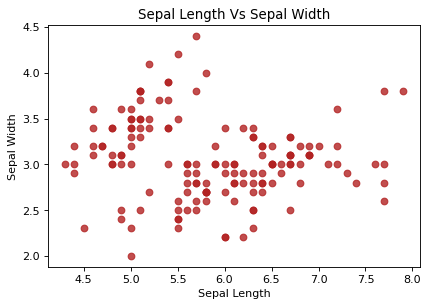

In [7]:
## Plotting scatter plot between Sepal length and Sepal width

plt.figure(dpi=80)
plt.style.use("default")
plt.scatter(iris.iloc[:,0], iris.iloc[:,1], color = "firebrick", alpha = 0.8)
plt.title("Sepal Length Vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

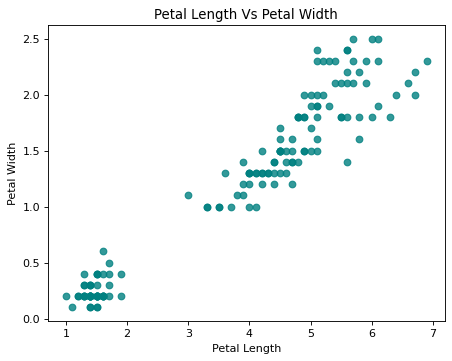

In [8]:
## Plotting scatter plot between Petal length and Petal width

plt.figure(dpi=80)
plt.style.use("default")
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], color = "teal", alpha = 0.8)
plt.title("Petal Length Vs Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [9]:
## Converting attributs into 2D-array

iris = iris.iloc[:,0:4].values

### Determining the Optimum number of clusters

In [10]:
## Finding the optimum number of clusters

wcss = [] #assingning an empty list for "within-cluster sum of square"

for i in range(1,16):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
               n_init = 10, random_state = 0)
    km.fit(iris)
    wcss.append(km.inertia_)

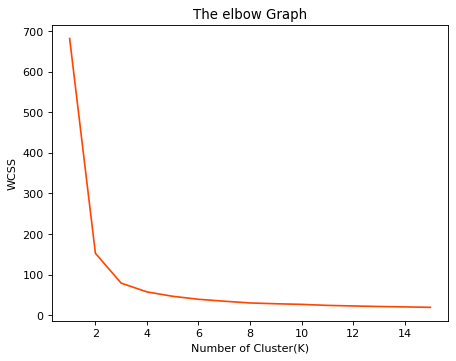

In [11]:
## Plotting the elbow graph

plt.figure(dpi=80)
plt.plot(range(1, 16), wcss, color = "orangered")
plt.title('The elbow Graph')
plt.xlabel('Number of Cluster(K)')
plt.ylabel('WCSS') 
plt.show()

From the above graph, we get to know that the elbow occurs at k=3. Since, the WCSS does not decreases significanty from 3. Therefore, we can conclude that the optimum number of clusters is "3".

### Building the Classifier model and Scoring

In [12]:
## Building the classifier model with K=3

km = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300,
            n_init = 10, random_state = 0)
y_km = km.fit_predict(iris)

In [13]:
## Prediction class(labels) for each obseravtions in iris dataset

y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Visualizing the Clusters

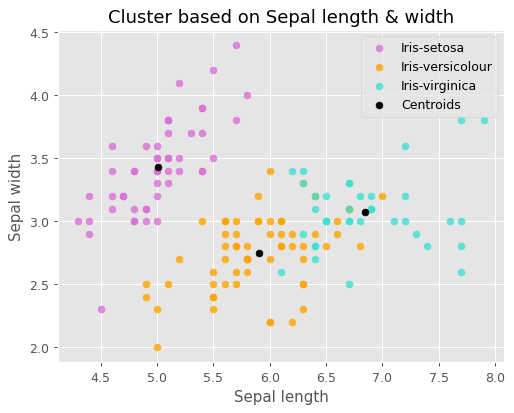

In [15]:
## Visualizing the clusters on the Sepal length and Sepal width

plt.figure(dpi=90)
plt.style.use("ggplot")
plt.scatter(iris[y_km == 1, 0], iris[y_km == 1, 1], 
            s = 30, c = 'orchid', label = 'Iris-setosa', alpha = 0.8)
plt.scatter(iris[y_km == 2, 0], iris[y_km == 2, 1],
            s = 30, c = 'orange', label = 'Iris-versicolour', alpha = 0.8)
plt.scatter(iris[y_km == 0, 0], iris[y_km == 0, 1], 
            s = 30, c = 'turquoise', label = 'Iris-virginica', alpha = 0.8)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Cluster based on Sepal length & width")


## Plotting the centroids of the clusters

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 30, c = 'black', label = 'Centroids')
plt.legend(prop={"size":10})
plt.show()

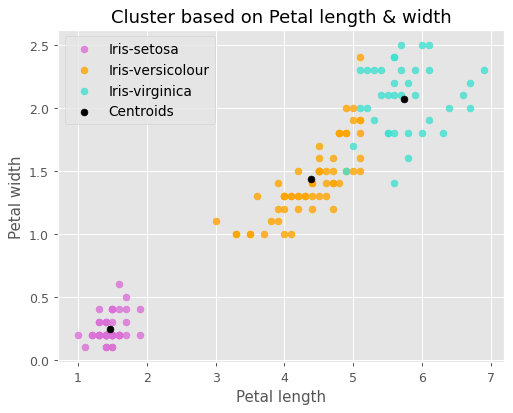

In [16]:
## Visualizing the clusters on the Petal length and Petal width

plt.figure(dpi=90)
plt.style.use("ggplot")
plt.scatter(iris[y_km == 1, 2], iris[y_km == 1, 3], 
            s = 30, c = 'orchid', label = 'Iris-setosa', alpha = 0.8)
plt.scatter(iris[y_km == 2, 2], iris[y_km == 2, 3],
            s = 30, c = 'orange', label = 'Iris-versicolour', alpha = 0.8)
plt.scatter(iris[y_km == 0, 2], iris[y_km == 0, 3], 
            s = 30, c = 'turquoise', label = 'Iris-virginica', alpha = 0.8)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Cluster based on Petal length & width")


## Plotting the centroids of the clusters

plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], 
            s = 30, c = 'black', label = 'Centroids')
plt.legend(prop={"size":11})
plt.show()

## Conclusion

1. We have successfully predicted the optimum number of clusters, that is k = '3' and also represented it visually.
2. Moreover, we can also visualize the clusters between Sepal length & Petal length, Sepal length & Petal width as well as petal    length and Sepal width and Petal width & Sepal width. 